# Quick usage examples for PyDSD #
This notebook shows some (very) brief examples of current PyDSD functionality and how to interact with it. PyDSD is used to read in disdrometer and particle probe data, plot the distributions, calculate parameterizations, radar equivalent parameters, Convective/Stratiform partitioning, and plot the results. 

## Getting Started ##
Let's start by reading in parsivel data which has been stored in a netCDF format by the Department of Energy ARM Program for the CACTI field campaign in Argentina. This data can be retrieved from the ARM archive. 

In [83]:
%matplotlib inline

import pydsd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pydsd.plot
import pydsd.partition

In [2]:
filename = './corldM1.b1.20181112.000000.cdf.v0' #Parsivel 05, March 2nd

Reading in files is quite easy. There are several readers in pydsd in either `pydsd.io` or `pydsd.io.aux_readers` depending on their level of support. In this case we will use the `read_parsivel_arm_netcdf` function. Generally we design readers for each new format we encounter so if you find a format that we cannot read, feel free to forward it to us, or even better submit a reader yourself. They are very easy to implement.  

In [4]:
dsd = pydsd.read_parsivel_arm_netcdf(filename)

So at this point we have the drop size distribution read in. Let's start by looking at the format of the dsd object. A full listing of the features can be found at http://josephhardinee.github.io/PyDSD/pydsd.html#module-pydsd.DropSizeDistribution .

Generally data is stored in the fields dictionary. This is a dictionary of dictionaries where each key corresponds to a variable. Inside each of these dictionaries the data is stored in `data` while other metadata is attached at the top level. 

In [9]:
dsd.fields.keys()

dict_keys(['Nd', 'velocity', 'rain_rate', 'drop_spectrum'])

In [10]:
dsd.fields['Nd']

{'data': masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 'units': 'm^-3 mm^-1',
 'long_name': 'Liquid water particle concentration',
 'standard_name': 'Nd'}

We can now start to plot and visualize some of this data. PyDSD has several built in plotting functions, and you can always pull the data out yourself for more custom plotting routines. Many built-in plotting routines are available in the `pydsd.plot` module. 

Text(0.5, 1.0, 'Drop Size Distribution - November 12, 2018')

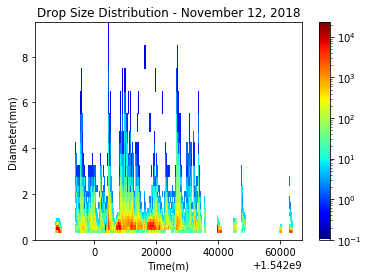

In [14]:
pydsd.plot.plot_dsd(dsd)
plt.title('Drop Size Distribution - November 12, 2018')

Plotting routines usually take in extra arguments to help customize the plot. Please check the documentation for the full list of arguments. We'll revisit plotting in a bit once we've calculated a few more interesting parameters. 

Depending on the type of Disdrometer, the drop spectra may be stored. PyDSD has some capabilities for working with spectra data including filtering, and reducing this back down to a DSD measurement.     
TODO: Examples of spectra processing

## DSD Estimation
PyDSD has routines implemented for calculating various parameterizations of the Drop Size Distribution. A default set of these can be called using the `DropSizeDistribution.calculate_dsd_parameterization` class function. Let's do this and see what we get. 

In [15]:
dsd.calculate_dsd_parameterization()

/Users/hard505/github.com/PyDSD/pydsd/DropSizeDistribution.py:349: RuntimeWarning: invalid value encountered in true_divide
  self._calc_mth_moment(4), self._calc_mth_moment(3)
/Users/hard505/github.com/PyDSD/pydsd/DropSizeDistribution.py:467: RuntimeWarning: invalid value encountered in true_divide
  Lambda = np.power(np.divide(num, den), (1 / (moment_2 - moment_1)))


Now PyDSD will calculate various parameters and store these on the dsd object in the fields dictionary. 

In [16]:
dsd.fields.keys()

dict_keys(['Nd', 'velocity', 'rain_rate', 'drop_spectrum', 'D0', 'Dmax', 'Dm', 'Nt', 'Nw', 'N0', 'W', 'mu', 'Lambda'])

And we can dig down further and see what is in one of these objects. Similar to the defaults read in, this will store the values in the `data` member, and metadata attached to the object. 

In [17]:
dsd.fields['D0']

{'standard_name': 'median_drop_diameter',
 'units': 'mm',
 'long_name': 'Median Drop Diameter',
 'data': masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
              mask=False,
        fill_value=1e+20)}

Now we can use some built in plotting functions to examine these. The first plot type is a time series plot of arbitrary 1D parameters. For example we can plot the D0 variable corresponding to median drop diameter. The plots know how to handle time and various pieces of metadata. Note that you can pass through arguments accepted by plt.plot and we will pass these on so you can customize the plot. 

(<matplotlib.axes._subplots.AxesSubplot at 0x126831e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126831e48>)

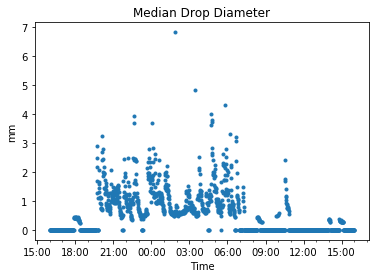

In [21]:
pydsd.plot.plot_ts(dsd, 'D0', marker='.')

These plots accept an axis argument as well incase you want to use this to make side by side comparison plots. 

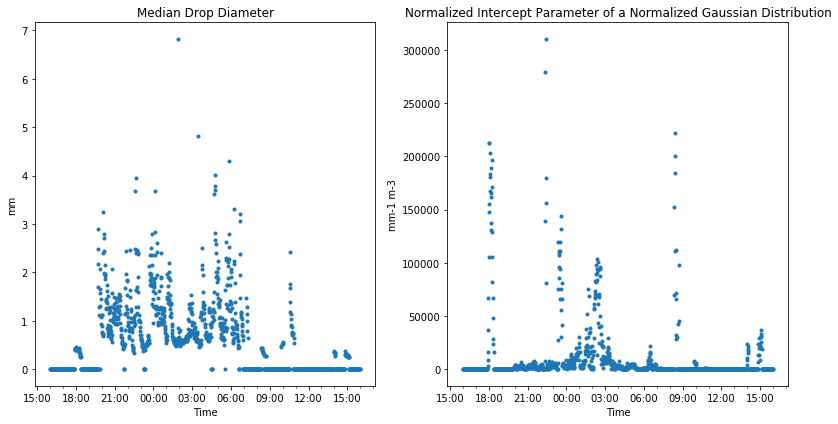

In [27]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
pydsd.plot.plot_ts(dsd, 'D0', marker='.', ax =ax)

ax = plt.subplot(1,2,2)
pydsd.plot.plot_ts(dsd, 'Nw', marker='.', ax =ax)
plt.tight_layout()

We have other standard types of plots built in to make life easier. For instance a normal thing to do is compare the relationship of the median drop diameter, with the normalized intercept parameter (Nw). 

/Users/hard505/github.com/PyDSD/pydsd/plot/plot.py:132: RuntimeWarning: divide by zero encountered in log10
  np.log10(dsd.fields["Nw"]["data"]),


(<matplotlib.axes._subplots.AxesSubplot at 0x127ab3160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127ab3160>)

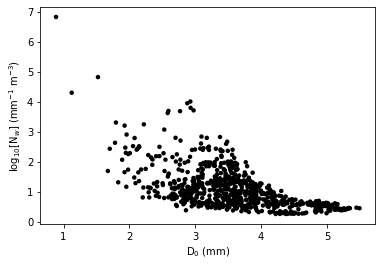

In [28]:
pydsd.plot.plot_NwD0(dsd)

As before we can compose these by passing in an ax argument.

/Users/hard505/github.com/PyDSD/pydsd/plot/plot.py:132: RuntimeWarning: divide by zero encountered in log10
  np.log10(dsd.fields["Nw"]["data"]),


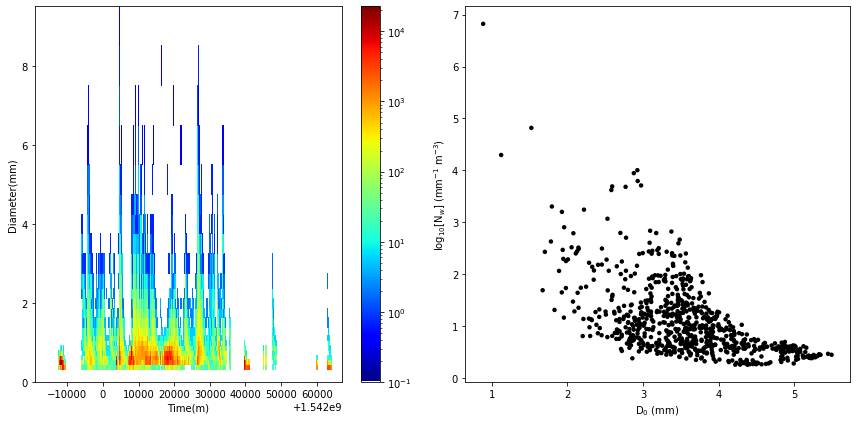

In [41]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
pydsd.plot.plot_dsd(dsd, ax=ax)

ax = plt.subplot(1,2,2)
pydsd.plot.plot_NwD0(dsd,  ax=ax)
plt.tight_layout()

Finally let's visualize a few more of the calculated fields. We can also look at what all new fields have appeared. 

In [50]:
dsd.fields.keys()

dict_keys(['Nd', 'velocity', 'rain_rate', 'drop_spectrum', 'D0', 'Dmax', 'Dm', 'Nt', 'Nw', 'N0', 'W', 'mu', 'Lambda', 'Zh', 'Zdr', 'delta_co', 'Kdp', 'Ai', 'Adr'])

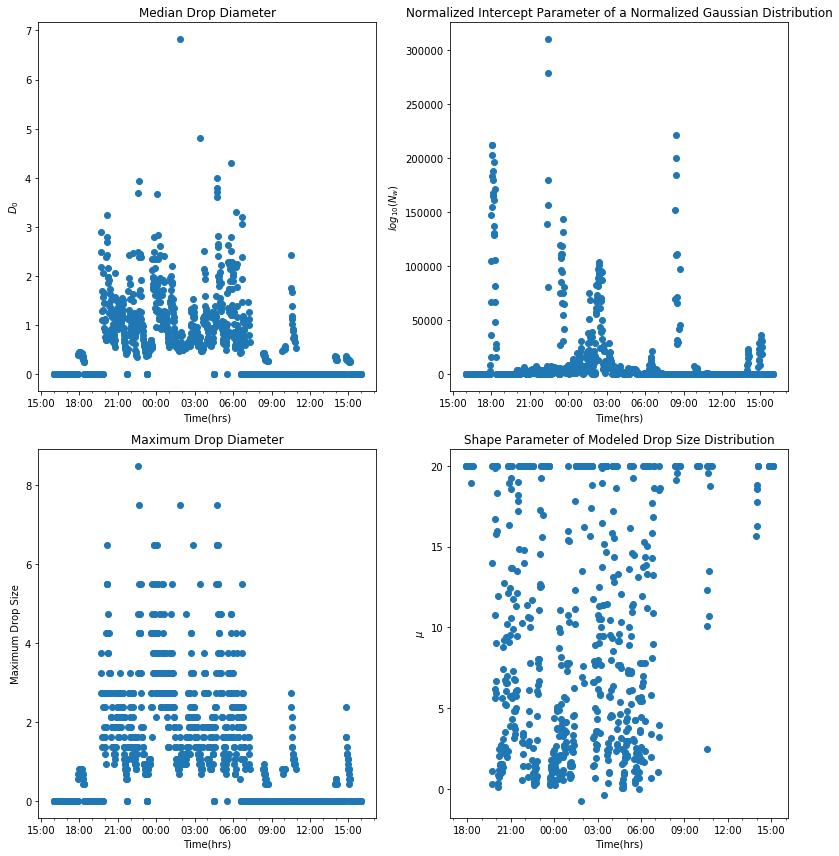

In [48]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
pydsd.plot.plot_ts(dsd, 'D0', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$D_0$')
# plt.xlim(5,24)

plt.subplot(2,2,2)
pydsd.plot.plot_ts(dsd, 'Nw', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$log_{10}(N_w)$')
# plt.xlim(5,24)

plt.subplot(2,2,3)
pydsd.plot.plot_ts(dsd, 'Dmax', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Maximum Drop Size')
# plt.xlim(5,24)

plt.subplot(2,2,4)
pydsd.plot.plot_ts(dsd, 'mu', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$\mu$')

plt.tight_layout()

plt.show()

Note the fit submodule has alternative algorithms for calculating various DSD parameter fits.

## Radar Equivalent Scattering

We can calculate radar equivalent parameters as well. We use the PyTMatrix library under the hood for this. Let's look at what these measurements would look like if we did T-Matrix scatttering at X-band, which is the default. 

In [42]:
dsd.calculate_radar_parameters()

/Users/hard505/github.com/PyDSD/pydsd/DropSizeDistribution.py:233: RuntimeWarning: divide by zero encountered in log10
  self.fields["Zh"]["data"][t] = 10 * np.log10(radar.refl(self.scatterer))
/Users/hard505/anaconda3/lib/python3.7/site-packages/pytmatrix/radar.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return radar_xsect(scatterer, True)/radar_xsect(scatterer, False)


This assumes BC shape relationship, X band, 10C. All of the scattering options are fully configurable. 

In [43]:
dsd.set_scattering_temperature_and_frequency(scattering_temp=10, scattering_freq=9700000000.0)
dsd.set_canting_angle(7)

Note this updates the parameters, but does not re-scatter the fields until you ask it to for computational reasons. Let's do that now while also changing the DSR we are using, and the maximum diameter we will scatter for. 

In [46]:
dsd.calculate_radar_parameters(dsr_func = pydsd.DSR.bc, max_diameter=7)

/Users/hard505/github.com/PyDSD/pydsd/DropSizeDistribution.py:233: RuntimeWarning: divide by zero encountered in log10
  self.fields["Zh"]["data"][t] = 10 * np.log10(radar.refl(self.scatterer))
/Users/hard505/anaconda3/lib/python3.7/site-packages/pytmatrix/radar.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return radar_xsect(scatterer, True)/radar_xsect(scatterer, False)


Similar to before these new fields will be added to the `DropSizeDistribution` object in the fields dictionary.

In [52]:
dsd.fields.keys()

dict_keys(['Nd', 'velocity', 'rain_rate', 'drop_spectrum', 'D0', 'Dmax', 'Dm', 'Nt', 'Nw', 'N0', 'W', 'mu', 'Lambda', 'Zh', 'Zdr', 'delta_co', 'Kdp', 'Ai', 'Adr'])

Now we can plot these variables up using our `pydsd.plot.plot_ts` function as before. 

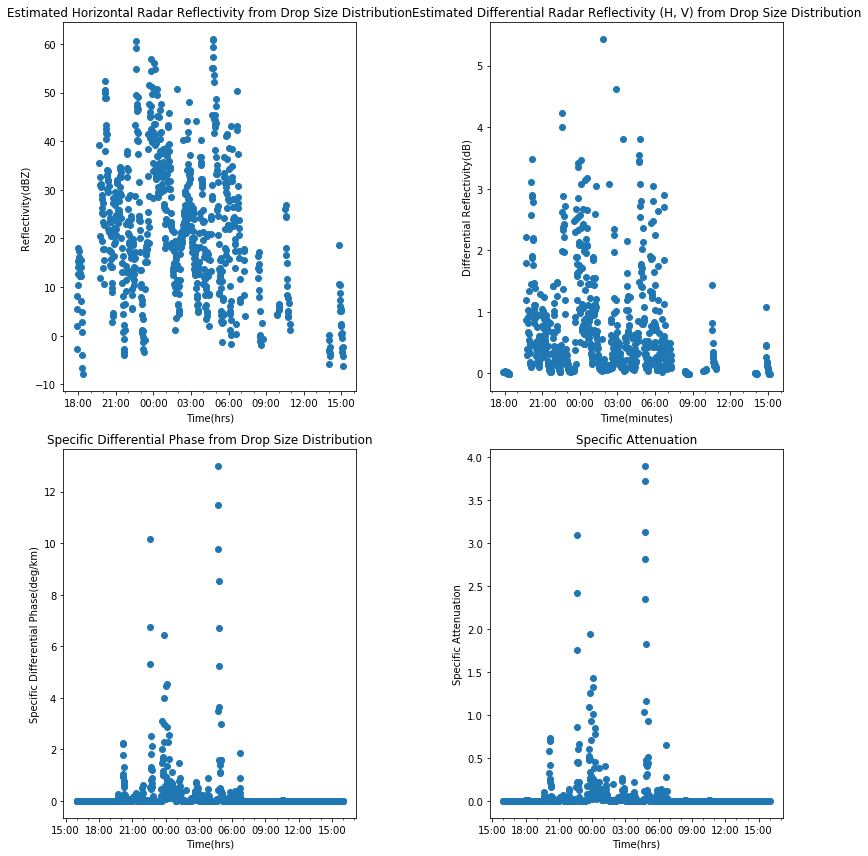

In [53]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
pydsd.plot.plot_ts(dsd, 'Zh', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Reflectivity(dBZ)')
# plt.xlim(5,24)

plt.subplot(2,2,2)
pydsd.plot.plot_ts(dsd, 'Zdr', x_min_tick_format='hour')

plt.xlabel('Time(minutes)')
plt.ylabel('Differential Reflectivity(dB)')
# plt.xlim(5,24)

plt.subplot(2,2,3)
pydsd.plot.plot_ts(dsd, 'Kdp', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Specific Differential Phase(deg/km)')
# plt.xlim(5,24)

plt.subplot(2,2,4)
pydsd.plot.plot_ts(dsd, 'Ai', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Specific Attenuation')
# plt.xlim(5,24)

plt.tight_layout()

plt.show()

## Rain Rate estimators
PyDSD has support for some fairly simple built in rain rate estimators for each of the polarimetric variables. Let's calculate a few of these and see how well they work out.

TODO: Add support for storing these on the object. 
TODO: Add better built in plotting support for these. 

In [63]:
(r_z_a, r_z_b), opt = dsd.calculate_R_Zh_relationship()
print(f'RR(Zh) = {r_z_a} Zh **{r_z_b}')

(r_kdp_a, r_kdp_b), opt = dsd.calculate_R_Kdp_relationship()
print(f'RR(KDP) = {r_kdp_a} KDP **{r_kdp_b}')

(r_zk_a, r_zk_b1, r_zk_b2), opt = dsd.calculate_R_Zh_Kdp_relationship()
print(f'RR(Zh, KDP) = {r_zk_a} Zh **{r_zk_b1} * KDP ** {r_zk_b2}')

RR(Zh) = 0.10108024979902261 Zh **0.4783558316461219
RR(KDP) = 13.675156807587392 KDP **0.7512561935648839
RR(Zh, KDP) = 256.01790965801223 Zh **-0.2907020926591584 * KDP ** 1.209716113587103


Let's visualize how good of a fit each of these estimators is. We have the measured rain rate from the disdrometer in the fields variable. 

/Users/hard505/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/Users/hard505/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hard505/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'R(Zh,KDP)')

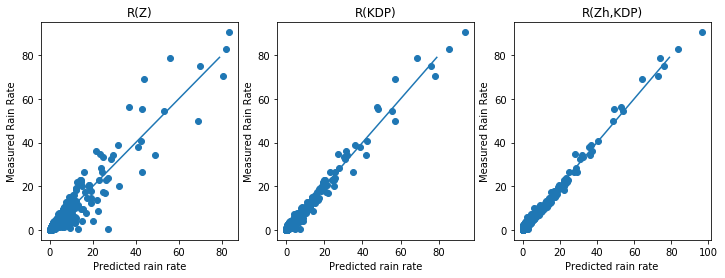

In [82]:
rr_z = r_z_a * np.power(dsd._idb(dsd.fields['Zh']['data']), r_z_b)
rr_kdp = r_kdp_a * np.power(dsd.fields['Kdp']['data'], r_kdp_b)
rr_zk = r_zk_a * np.power(dsd._idb(dsd.fields['Zh']['data']), r_zk_b1)* np.power(dsd.fields['Kdp']['data'], r_zk_b2)



plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(rr_z, dsd.fields['rain_rate']['data'])
plt.plot(np.arange(0,80))
plt.xlabel('Predicted rain rate')
plt.ylabel('Measured Rain Rate')
plt.title('R(Z)')

plt.subplot(1,3,2)
plt.scatter(rr_kdp, dsd.fields['rain_rate']['data'])
plt.plot(np.arange(0,80))
plt.xlabel('Predicted rain rate')
plt.ylabel('Measured Rain Rate')
plt.title('R(KDP)')

plt.subplot(1,3,3)
plt.scatter(rr_zk, dsd.fields['rain_rate']['data'])
plt.plot(np.arange(0,80))
plt.xlabel('Predicted rain rate')
plt.ylabel('Measured Rain Rate')
plt.title('R(Zh,KDP)')

As expected, estimators that use polarimetry tend to do much better. 

## Convective Stratiform Partitioning
Finally we have several algorithms that exist for stratiform partitioning in a variety of situations. Let's look at an applicable ground based one due to Bringi

In [86]:
cs = pydsd.partition.cs_partition.cs_partition_bringi_2010(dsd.fields['Nw']['data'], dsd.fields['D0']['data'])

We have a few ways we can choose to visualize this. One is to just look at the ouput where 0-unclassified, 1-Stratiform, 2-convective, 3-transition

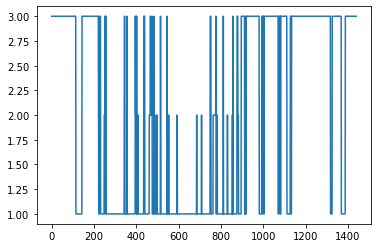

In [87]:
plt.plot(cs)

We can also color code the D0,Nw points to get a better visual understanding of this algorithm.  

/Users/hard505/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


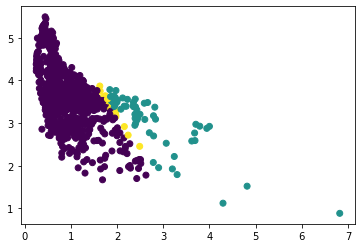

In [92]:
plt.scatter(dsd.fields['D0']['data'], np.log10(dsd.fields['Nw']['data']), c=cs)